In [1]:
import torch
import torch.nn.functional as F
from PIL import Image, ImageDraw
from torchvision import transforms
import json

In [20]:
#test_image = Image.open("github-eg.jpg")
test_image = Image.open("khanacademy_web.jpg")

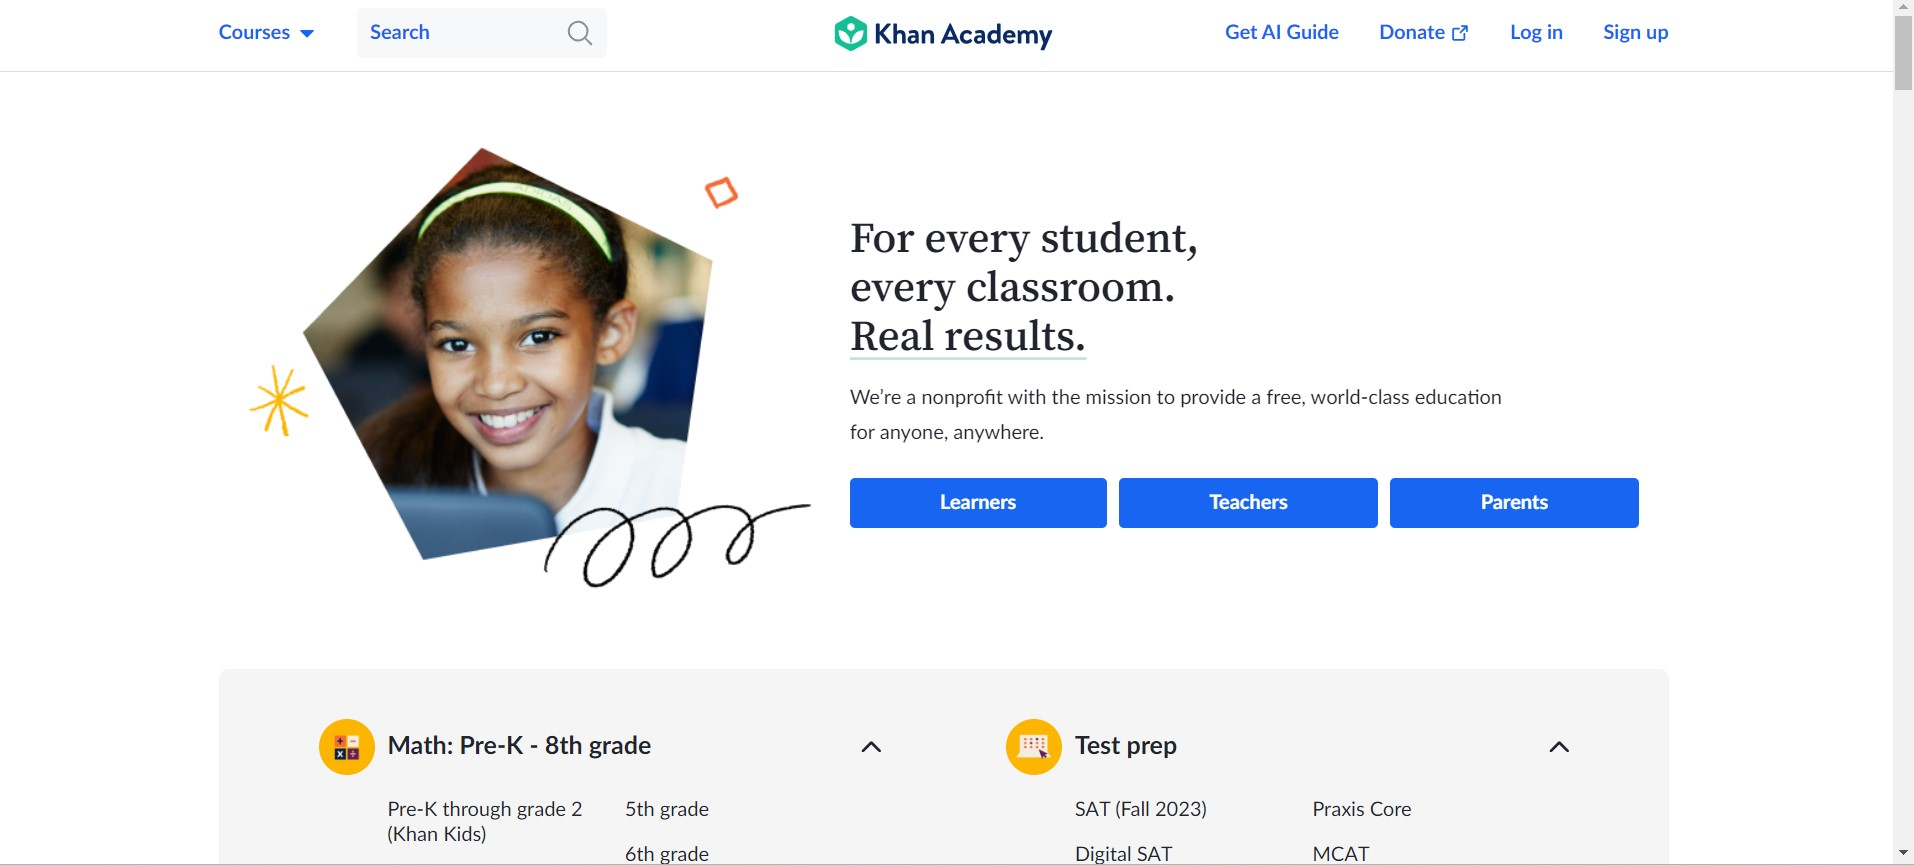

In [21]:
test_image

In [22]:
#m = torch.jit.load("../downloads/checkpoints/screenrecognition-web350k-vins.torchscript")
m7k = torch.jit.load("../downloads/checkpoints/screenrecognition-web7k.torchscript")
m350k = torch.jit.load("../downloads/checkpoints/screenrecognition-web350k.torchscript")

mvins = torch.jit.load("../downloads/checkpoints/screenrecognition-web350k-vins.torchscript") # model

In [23]:
img_transforms = transforms.ToTensor()

In [24]:
def class_map(vins=True):
    if vins: class_map_file = "../metadata/screenrecognition/class_map_vins_manual.json"
    else: class_map_file = "../metadata/screenrecognition/class_map.json"
    with open(class_map_file, "r") as f:
        class_map = json.load(f)
        
    return class_map['idx2Label']

idx2Label_vins = class_map(True)
idx2Label_350k = class_map(False)

In [25]:
idx2Label_vins

{'1': 'OTHER',
 '2': 'Background Image',
 '3': 'Checked View',
 '4': 'Icon',
 '5': 'Input Field',
 '6': 'Image',
 '7': 'Text',
 '8': 'Text Button',
 '9': 'Page Indicator',
 '10': 'Pop-Up Window',
 '11': 'Sliding Menu',
 '12': 'Switch',
 '0': 'BACKGROUND'}

In [26]:
idx2Label_350k

{'2': 'StaticText',
 '3': 'link',
 '4': 'listitem',
 '5': 'paragraph',
 '6': 'heading',
 '7': 'img',
 '8': 'LineBreak',
 '9': 'generic',
 '10': 'gridcell',
 '11': 'button',
 '12': 'separator',
 '13': 'time',
 '14': 'LayoutTableCell',
 '15': 'LabelText',
 '16': 'figure',
 '17': 'textbox',
 '18': 'list',
 '19': 'Iframe',
 '20': 'Pre',
 '21': 'strong',
 '22': 'columnheader',
 '23': 'Canvas',
 '24': 'DescriptionListTerm',
 '25': 'DescriptionListDetail',
 '26': 'HeaderAsNonLandmark',
 '27': 'superscript',
 '28': 'row',
 '29': 'checkbox',
 '30': 'Abbr',
 '31': 'code',
 '0': 'BACKGROUND',
 '1': 'OTHER'}

In [27]:
img_input = img_transforms(test_image)
print(img_input.shape)

torch.Size([3, 865, 1914])


In [28]:
#pred_7k = m7k([img_input])[1]
pred_350k = m350k([img_input])[1]

pred_vins = mvins([img_input])[1]

In [29]:
pred_vins

[{'boxes': tensor([[ 383.9627,  736.4628,  646.5387,  760.6616],
          [1308.7273,  793.2358, 1413.9235,  823.8951],
          [ 400.9414,  801.9810,  596.6703,  830.7061],
          [ 627.3703,  793.3720,  714.4886,  820.5749],
          [ 698.0002,  174.4769,  741.4979,  211.9791],
          [1062.5431,  791.9894, 1208.6742,  819.9833],
          [ 836.3993,  231.0709, 1198.2404,  339.8943],
          [ 850.5006,  411.5745, 1054.1110,  438.9402],
          [ 916.3047,  483.1765, 1047.9351,  515.8983],
          [ 860.3393,  247.9183, 1193.6830,  317.2892],
          [ 885.5945,  306.0728, 1107.7036,  346.2537],
          [1074.4541,  739.7095, 1185.4163,  763.6522],
          [ 852.7823,  224.1212, 1189.4460,  284.4383],
          [ 249.4492,  352.4178,  314.1003,  437.1907],
          [1004.0438,  716.2733, 1058.3170,  775.9860],
          [ 314.5291,  720.4546,  371.4908,  787.6464],
          [1004.0438,  716.2733, 1058.3170,  775.9860],
          [1549.0868,  737.0989, 1569.6

In [30]:
def draw_prediction(pred, vins=True):
    idx2Label = idx2Label_vins if vins else idx2Label_350k
    
    draw = ImageDraw.Draw(test_image)

    conf_thresh = 0.5
    for i in range(len(pred[0]['boxes'])):
        conf_score = pred[0]['scores'][i]
        if conf_score > conf_thresh:
            x1, y1, x2, y2 = pred[0]['boxes'][i]
            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)
            draw.rectangle([x1, y1, x2, y2], outline='red')
            draw.text((x1, y1), idx2Label[str(int(pred[0]['labels'][i]))] + " {:.2f}".format(float(conf_score)), fill="red")

    #test_image

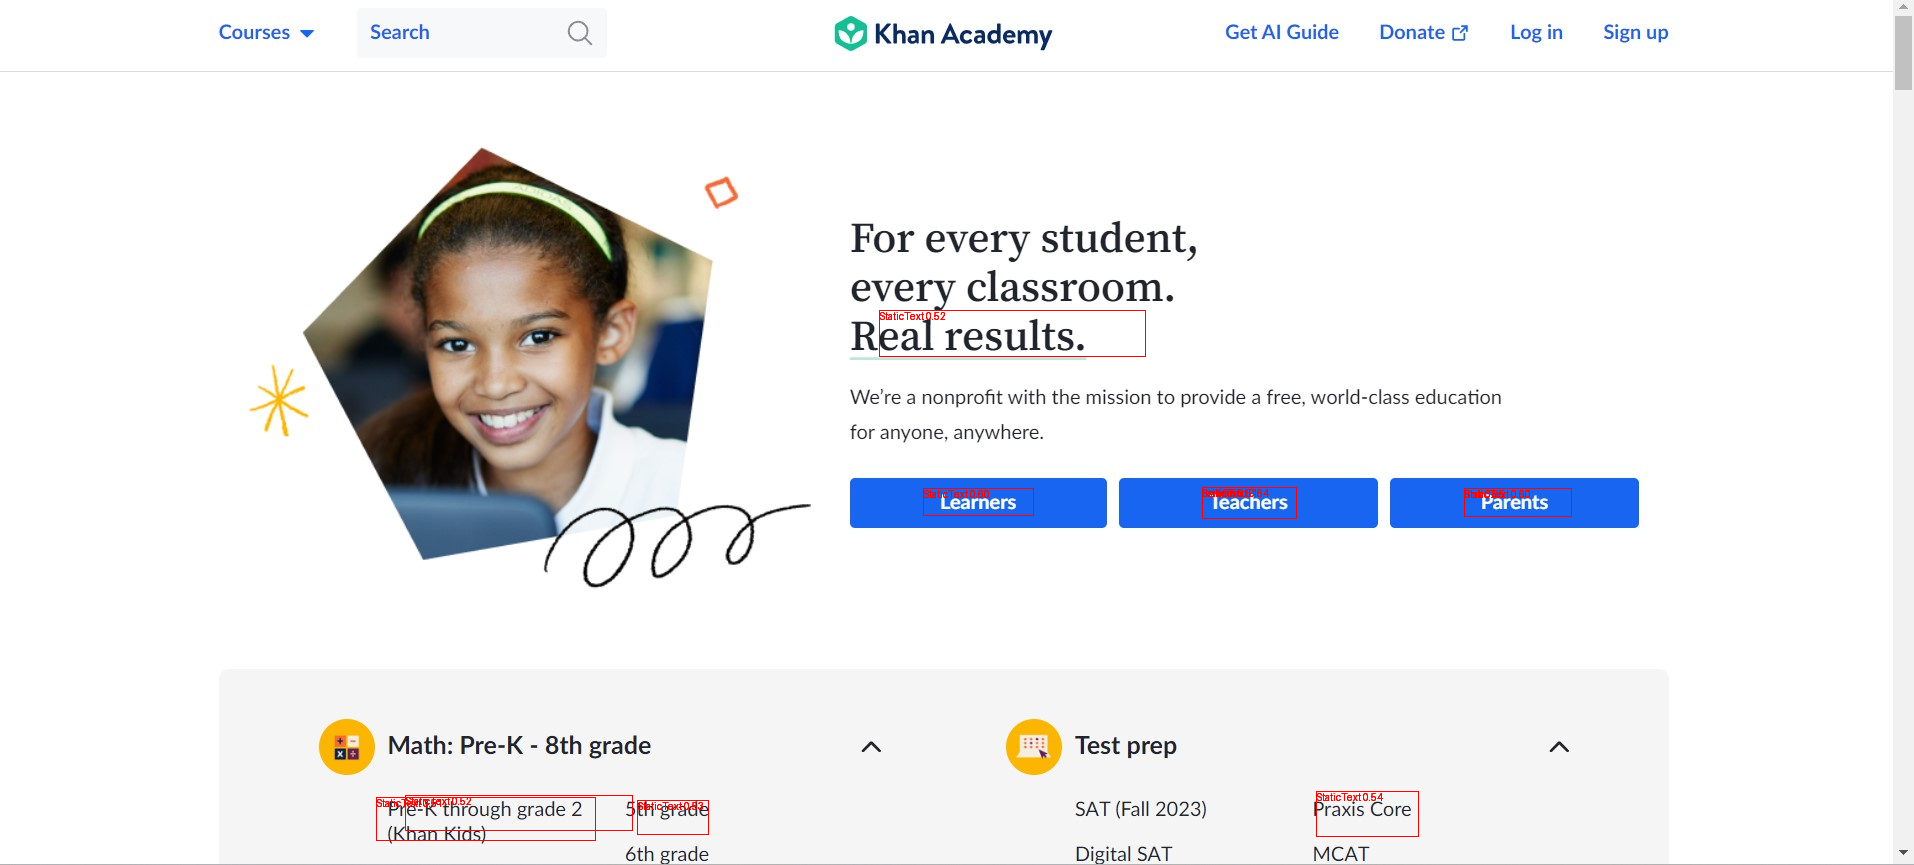

In [33]:
draw_prediction(pred_350k, vins=False)
test_image

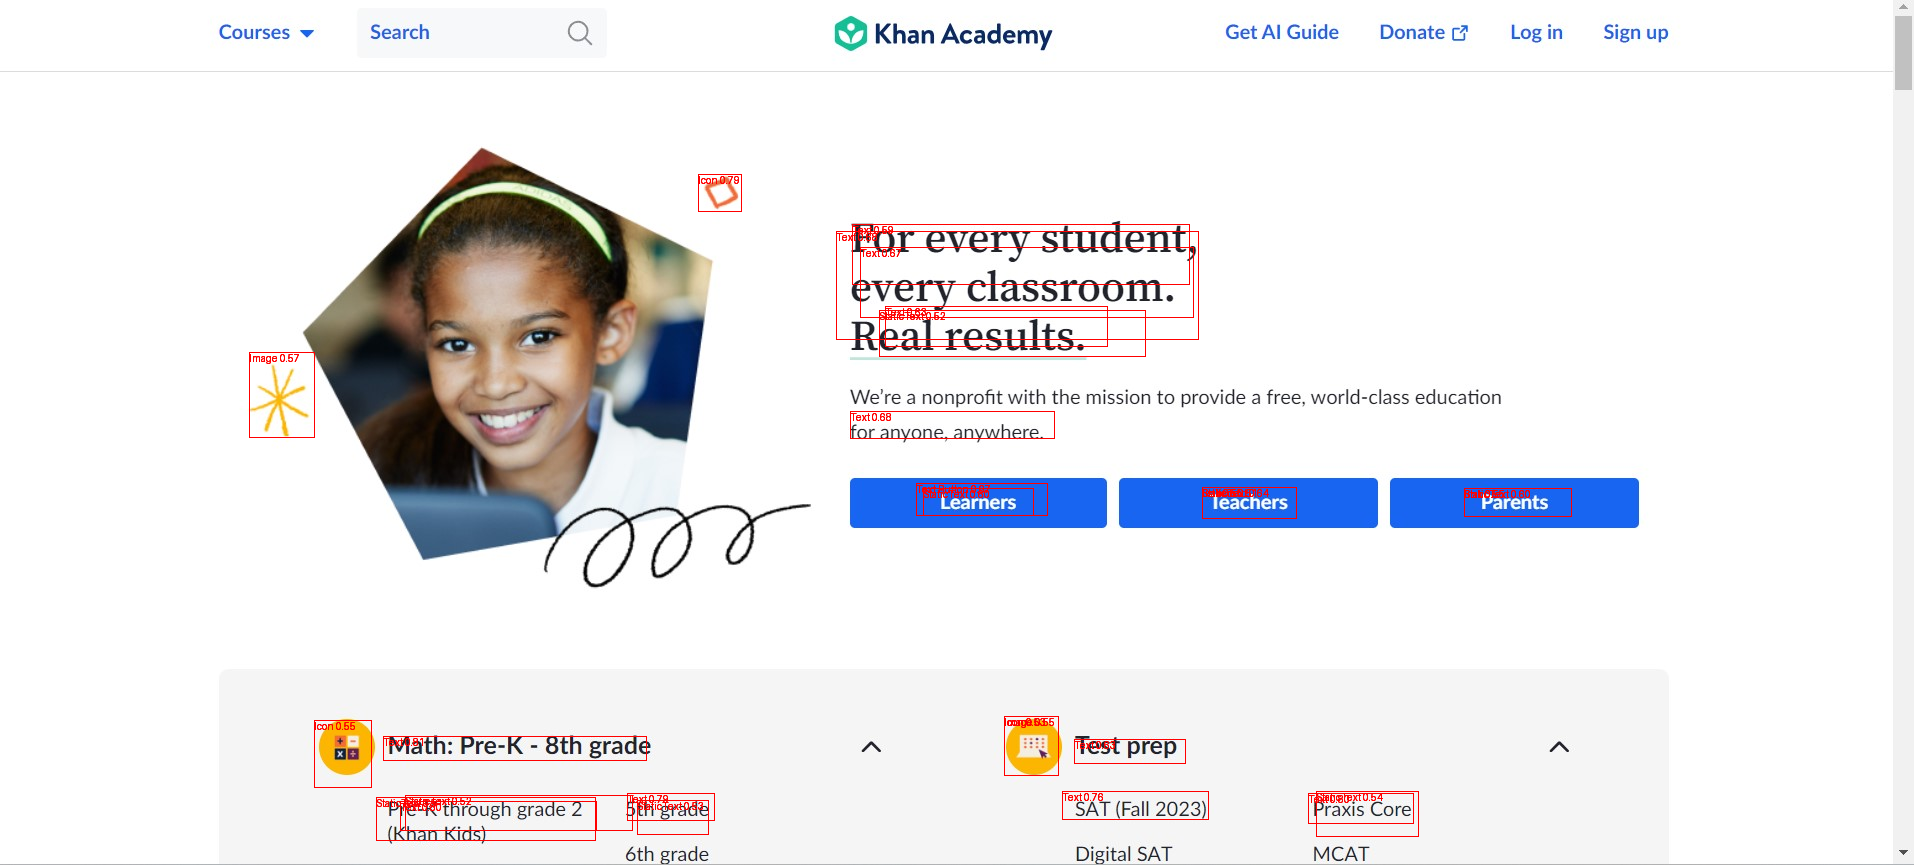

In [36]:
draw_prediction(pred_vins, vins=True)
test_image

In [18]:
from tqdm import tqdm

vins_test_imgs = torch.load('../models/screenrecognition/vins_test_pred/vins_test_imgs.pt')

pred_all = []
for batch_i in tqdm(range(len(vins_test_imgs))):
    pred = model([vins_test_imgs[batch_i]])
    pred_all.append(pred)
    print('Completed: ', batch_i)

: 

In [37]:
test_image = Image.open('github-eg.jpg')
test_image_t = img_transforms(test_image)

pred_github_350k = m350k([test_image_t])[1]
pred_github_vins = mvins([test_image_t])[1]

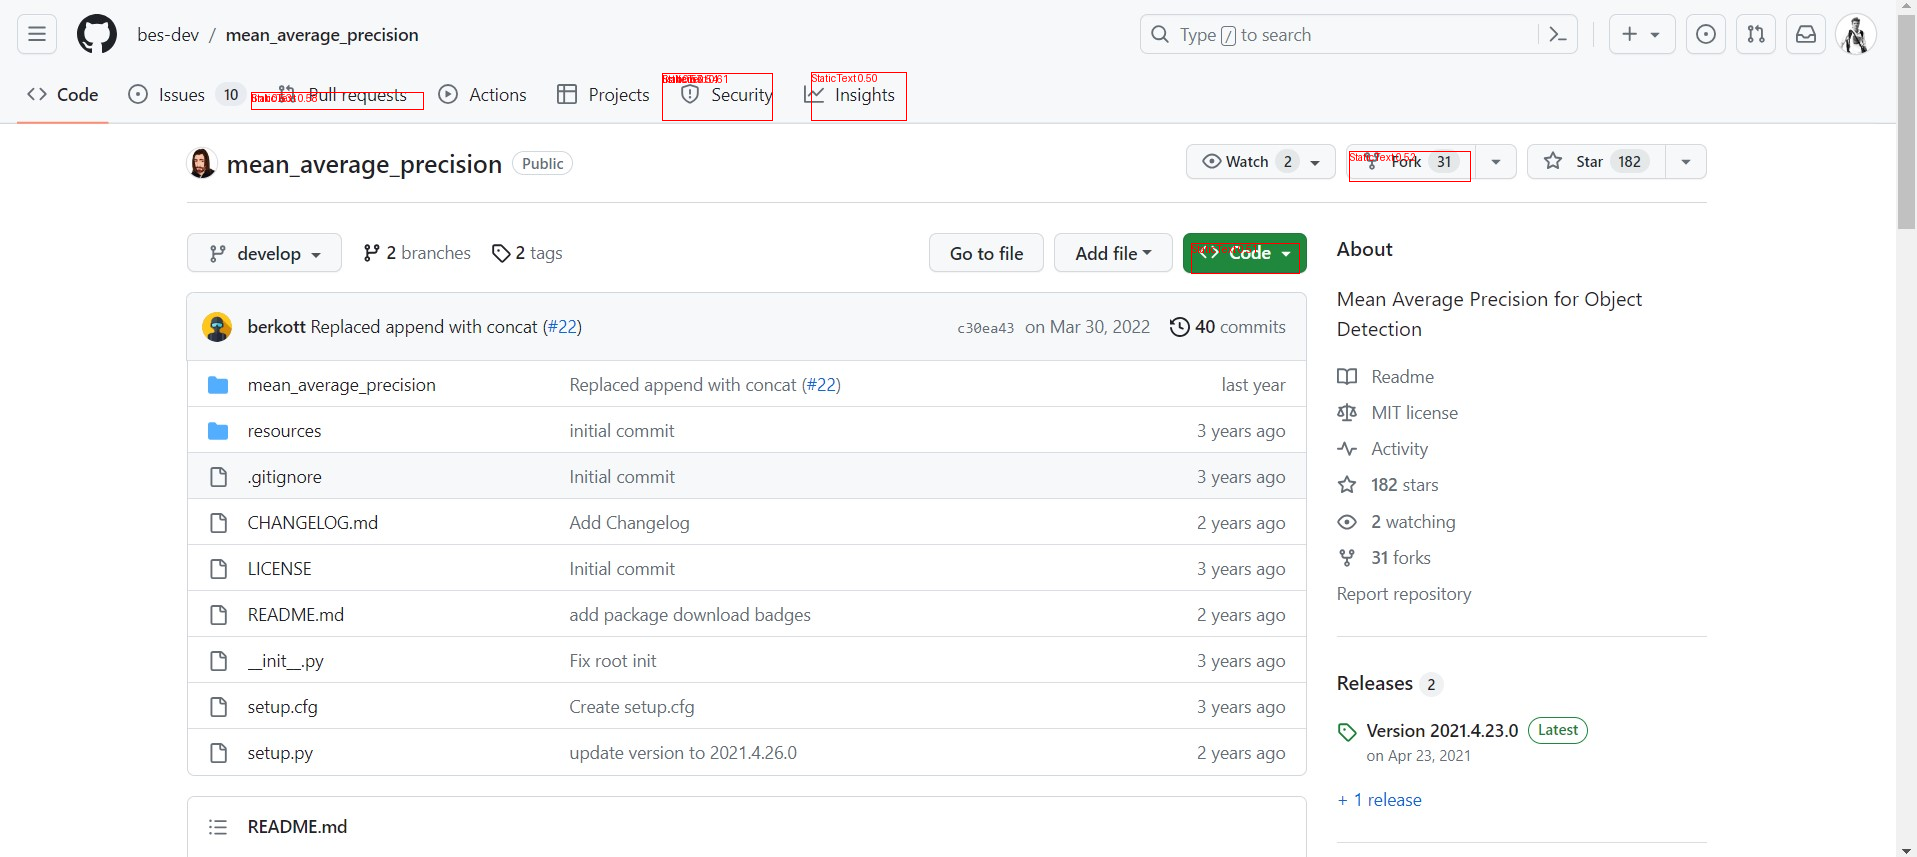

In [38]:
draw_prediction(pred_github_350k, vins=False)
test_image

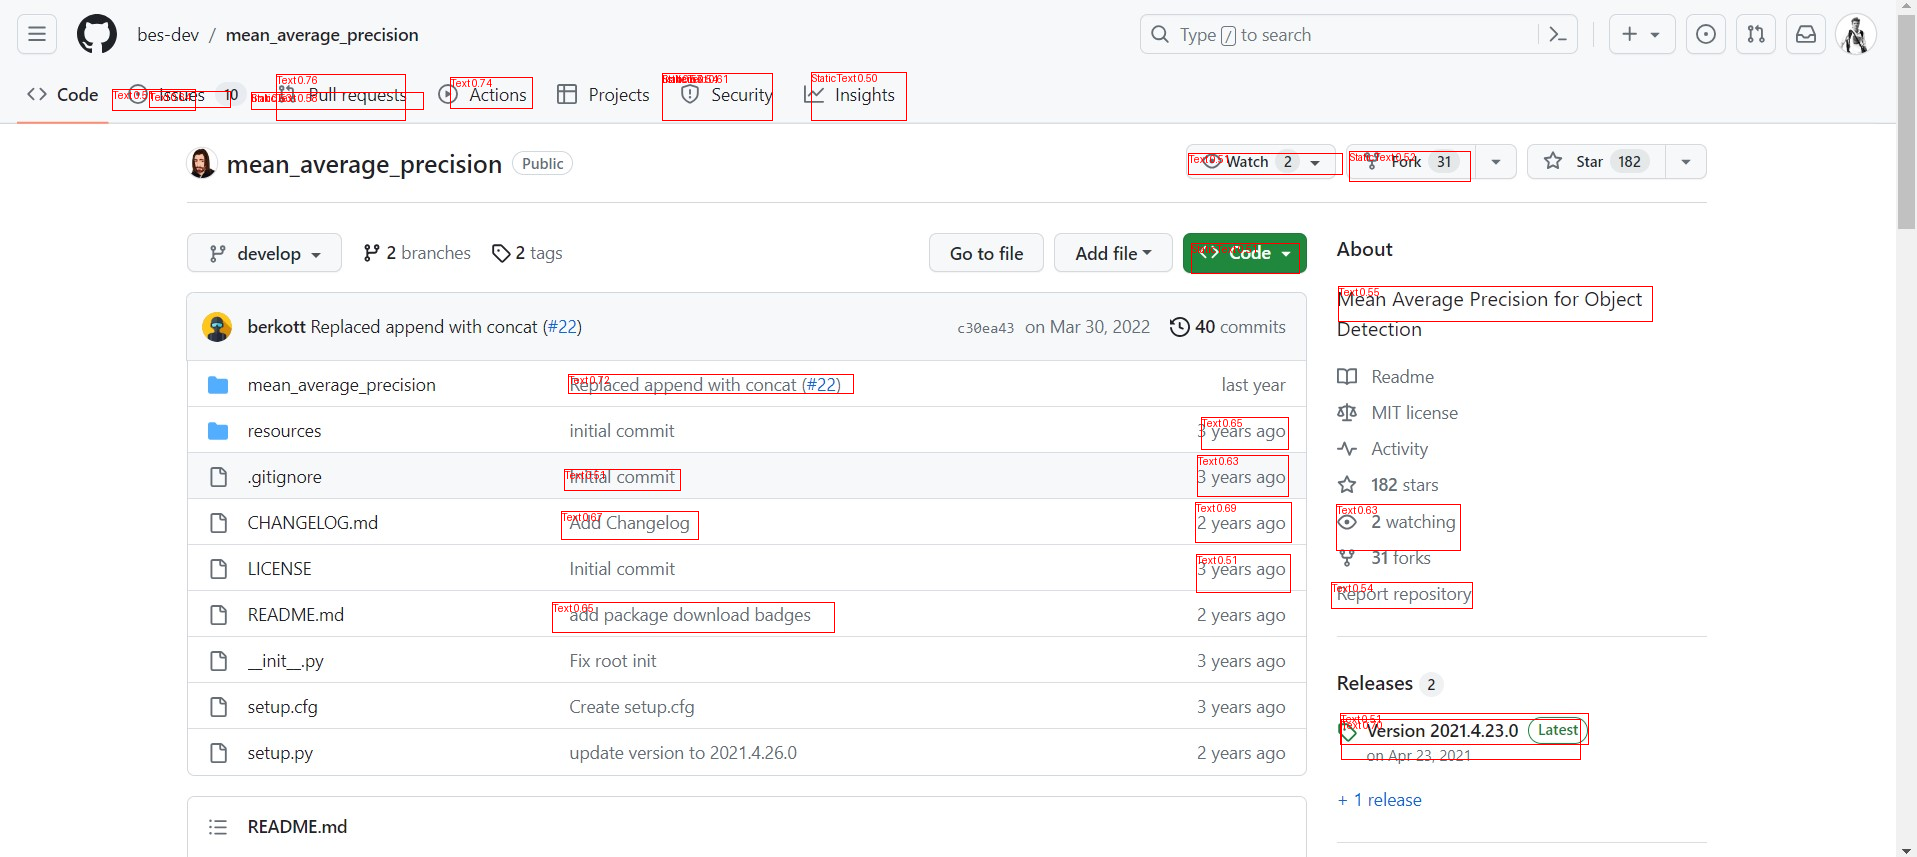

In [39]:
draw_prediction(pred_github_vins, vins=True)
test_image